<a href="https://colab.research.google.com/github/janValasek/Statistics/blob/master/regresia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd 
from google.colab import drive 

drive.mount('/content/gdrive')

euGDP= pd.read_csv('gdrive/My Drive/EUBA/Regresia/euGDPcp.csv', sep=';')
taxRev= pd.read_csv('gdrive/My Drive/EUBA/Regresia/taxRevenue.csv', sep=';')
euGDP["GDP"] = euGDP["GDP"]/1000000
dataJoin = euGDP.join(taxRev["TaxRevenue"]/1000000)
dataJoin = dataJoin.drop(dataJoin.index[8])

dataJoin = dataJoin.apply(pd.to_numeric)
dfS = dataJoin.iloc[:, 1:3]
print(dataJoin)
dfS.describe() 






Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
     Year        GDP  TaxRevenue
0  2012.0  11.391844    4.610793
1  2013.0  11.520159    4.716563
2  2014.0  11.783874    4.832375
3  2015.0  12.214624    4.989087
4  2016.0  12.552500    5.139246
5  2017.0  13.076032    5.363495
6  2018.0  13.531537    5.565630
7  2019.0  14.017174    5.746567


,GDP,TaxRevenue
count,8.000000,8.000000
mean,12.510968,5.120469
std,0.962279,0.409311
min,11.391844,4.610793
25%,11.717946,4.803422
50%,12.383562,5.064166
75%,13.189908,5.414029
max,14.017174,5.746567


                 GDP  TaxRevenue
GDP         1.000000    0.999036
TaxRevenue  0.999036    1.000000


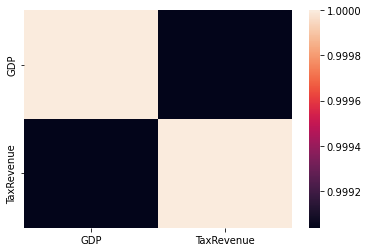

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


print(dfS.corr())
sns.heatmap(dfS.corr())

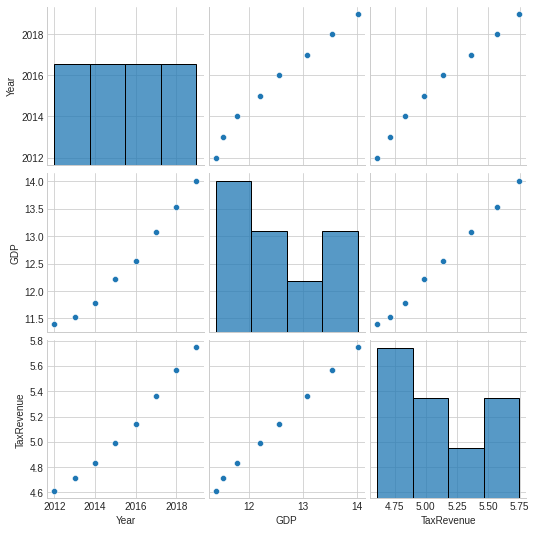

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(dataJoin)




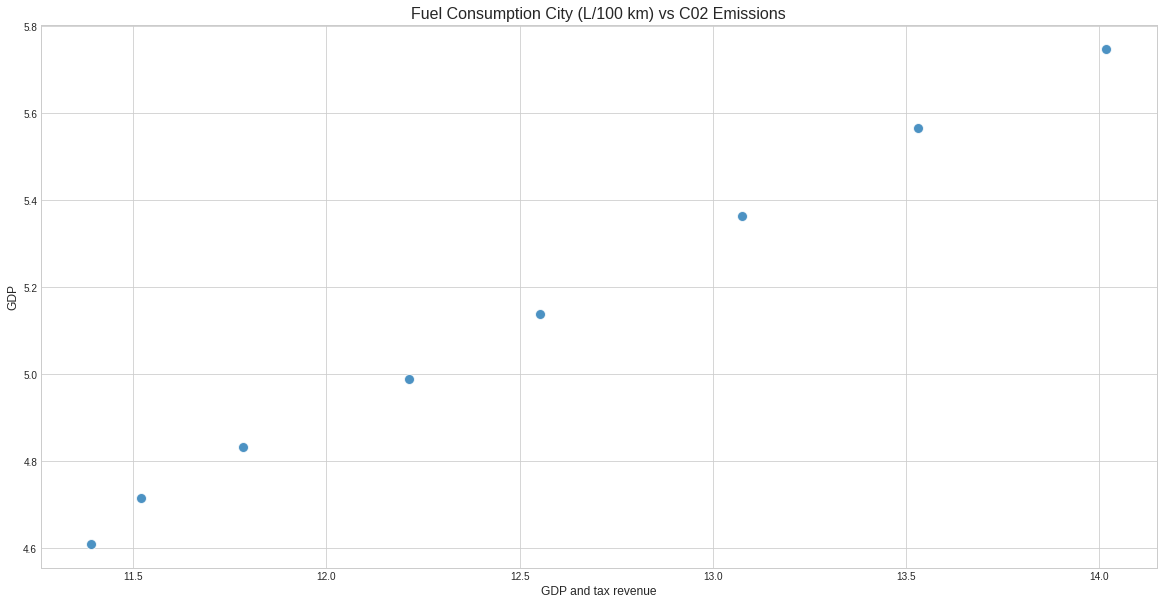

In [ ]:
plt.scatter(x = 'GDP', y = 'TaxRevenue', data = dataJoin, s = 100, alpha = 0.8, edgecolor = 'white')
plt.title('Fuel Consumption City (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('GDP', fontsize = 12)
plt.xlabel('GDP and tax revenue', fontsize = 12)

plt.savefig('fccity_co2.png')


In [12]:
import statsmodels.api as sm
from termcolor import colored as cl


X_var = dataJoin[["GDP"]] # independent variable
y_var = dataJoin["TaxRevenue"] # dependent variable


slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
print(slr_model)
slr_reg = slr_model.fit()

print(cl(slr_reg.summary(), attrs = ['bold']))



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:             TaxRevenue   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.843e+05
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                    7.51e-18
Time:                        22:24:00   Log-Likelihood:                          19.213
No. Observations:                   8   AIC:                                     -36.43
Df Residuals:                       7   BIC:                                     -36.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


R-Squared : 0.993335678151915


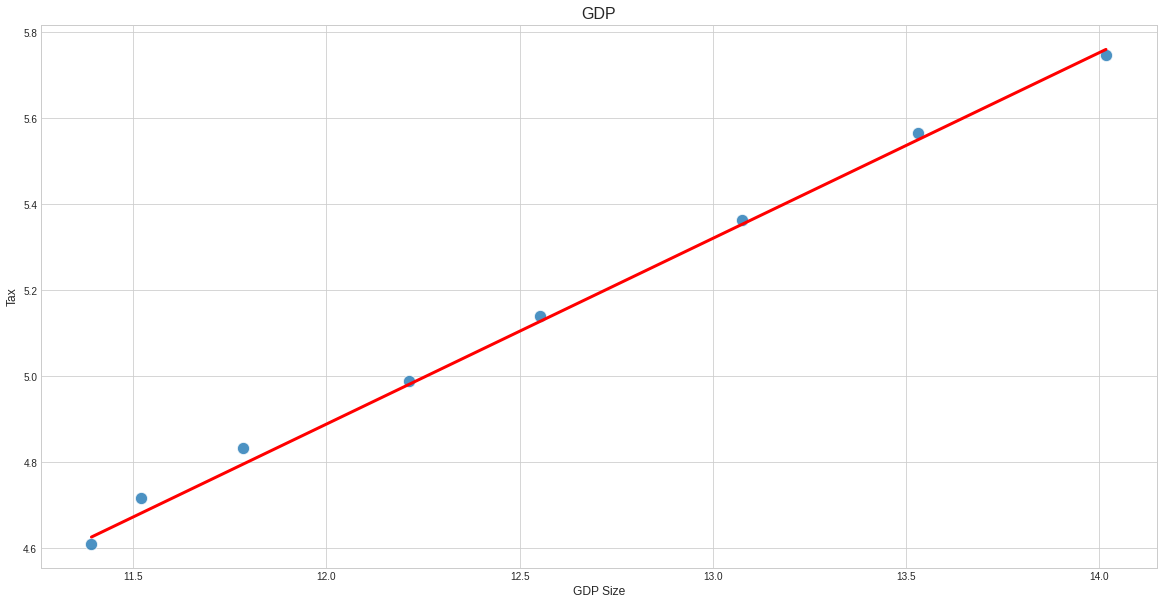

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_var = dataJoin[["GDP"]] # independent variable
y_var = dataJoin["TaxRevenue"] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

slr_slope = lr.coef_
slr_intercept = lr.intercept_


sb.scatterplot(x = 'GDP', y = 'TaxRevenue', data = dataJoin, s = 150, alpha = 0.8, edgecolor = 'white')
plt.plot(dataJoin["GDP"], slr_slope*dataJoin["GDP"]+ slr_intercept, color = 'r', linewidth = 3)
plt.title('GDP', fontsize = 16)
plt.ylabel('Tax', fontsize = 12)
plt.xlabel('GDP Size', fontsize = 12)

print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))